In [1]:
# Linear regression practice

In [2]:
# Kaggle - https://www.kaggle.com/aungpyaeap/fish-market

In [3]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [37]:
# Check for na attributes
df.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

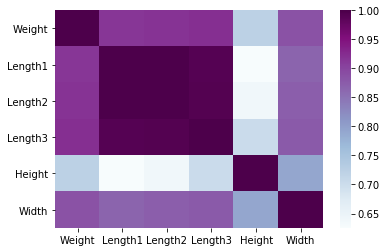

In [49]:
# Plot a heatmap
import seaborn as sns
sns.heatmap(df.corr(), cmap='BuPu')

In [48]:
from sklearn.pipeline import Pipeline

In [27]:
categorical_features = ['Species']

In [52]:
numerical_features = df.columns.to_list()
numerical_features.remove('Species')
numerical_features.remove('Weight')
numerical_features

['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [66]:
# Encode the Species since it is categorical attribute
df = pd.get_dummies(df)

# Split the data

In [72]:
from sklearn.model_selection import train_test_split
X = df.drop(['Weight'], axis=1)
Y = df['Weight']

In [74]:
X

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

# Train the model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
Y_pred = lr.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
lr.score(X_test, Y_test)

0.9482958230393619